In [2]:
# PASSO INICIAL: SETUP DO AMBIENTE E CARREGAMENTO DE DADOS

# 1. Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Carregando nosso arquivo de progresso final
# (Lembre-se de fazer o upload do arquivo 'tabela_analise_final.csv' antes)
df_completo = pd.read_csv('tabela_analise_final.csv')

# 3. Convertendo a coluna de data de volta para o formato datetime
df_completo['Data_Fechamento_Cambio'] = pd.to_datetime(df_completo['Data_Fechamento_Cambio'])

print ("Ambiente preparado! A tabela 'df_completo' e as bibliotecas de visualização estão prontas.")
display(df_completo.head())

Ambiente preparado! A tabela 'df_completo' e as bibliotecas de visualização estão prontas.


,ID_Processo,Data_Fechamento_Cambio,Taxa_Cambio_Negociada,Valor_FOB_USA,NCM_Produto,taxa_dolar_bcb,Impacto_Cambial_BRL,Tarifa_Adicional_BRL
0,imp-001,2025-03-26,5.4805,38365.87,84713012,5.7298,-9564.611391,109914.380963
1,imp-002,2024-08-05,5.7808,14333.79,85171231,5.7646,232.207398,41314.282917
2,imp-003,2025-07-06,5.4818,42258.29,85287200,5.7646,-11950.644412,121801.069267
3,imp-004,2024-08-14,5.5989,25786.54,85287200,5.4502,3834.458498,70270.900154
4,imp-005,2024-09-05,5.5393,47170.02,90065951,5.6049,-3094.353312,132191.622549


In [ ]:
# Passo 2: Configurando os parâmetros da nossa simulação
num_linhas = 100
data_inicio = datetime(2024, 7, 1)
data_fim = datetime(2025, 7, 18)
lista_ncms = ['84713012', '85171231', '90065951', '85287200']
print("Parâmetros definidos: Geraremos {num_linhas} linhas, entre as datas {data_inicio.strftime(%d/%m/%Y)} e {data_fim.strftime(%d/%m/%Y)}.")

Parâmetros definidos: Geraremos {num_linhas} linhas, entre as datas {data_inicio.strftime(%d/%m/%Y)} e {data_fim.strftime(%d/%m/%Y)}.


In [ ]:
# Passo 3: Preparando uma lista que vai armazenar os dados e iniciando o loop
dados =[] # Uma lista vazia para quardar cada linha criada
dias_no_periodo = (data_fim - data_inicio).days # Calculando o total de dias no nosso intervalo

for i in range(num_linhas):
  # Por enquanto, apenas imprimir uma mensagem para ver se o loop está funcionando
 id_processo = f"imp-{i+1:03d}"
 dias_aleatorios = random.randint(0, dias_no_periodo)
 data_fechamento = data_inicio + timedelta(days=dias_aleatorios)
 taxa_cambio = round(random.uniform(5.40, 5.80), 4)
 valor_fob = round(random.uniform(5000, 50000), 2)
 ncm = random.choice(lista_ncms)
 dados.append([id_processo, data_fechamento, taxa_cambio, valor_fob, ncm])

print("\nloop concluído!")


loop concluído!


In [ ]:
# Passo 4: Criando o Dataframe com o Pandas
colunas = ['ID_Processo', 'Data_Fechamento_Cambio', 'Taxa_Cambio_Negociada', 'Valor_FOB_USA', 'NCM_Produto']
df = pd.DataFrame(dados, columns=colunas)
# Vamos visualizar as 5 primeiras linhas da tabela
df.head()


,ID_Processo,Data_Fechamento_Cambio,Taxa_Cambio_Negociada,Valor_FOB_USA,NCM_Produto
0,imp-001,2025-03-26,5.4805,38365.87,84713012
1,imp-002,2024-08-05,5.7808,14333.79,85171231
2,imp-003,2025-07-06,5.4818,42258.29,85287200
3,imp-004,2024-08-14,5.5989,25786.54,85287200
4,imp-005,2024-09-05,5.5393,47170.02,90065951


In [ ]:
# Passo 5: Formatando a coluna de data para o padrão brasileiro
df['Data_Fechamento_Cambio'] = df['Data_Fechamento_Cambio'].dt.strftime('%d/%m/%Y')
# Verificação de Alteração
df.head()

,ID_Processo,Data_Fechamento_Cambio,Taxa_Cambio_Negociada,Valor_FOB_USA,NCM_Produto
0,imp-001,26/03/2025,5.4805,38365.87,84713012
1,imp-002,05/08/2024,5.7808,14333.79,85171231
2,imp-003,06/07/2025,5.4818,42258.29,85287200
3,imp-004,14/08/2024,5.5989,25786.54,85287200
4,imp-005,05/09/2024,5.5393,47170.02,90065951


In [ ]:
# Passo 6: Salvando o Dataframe em um formato Excel
nome_arquivo = 'dados_importacao_eua.xlsx'
df.to_excel(nome_arquivo, index=False)
print(f"Parabens! O arquivo '{nome_arquivo}' foi criado com sucesso.")


Parabens! O arquivo 'dados_importacao_eua.xlsx' foi criado com sucesso.


In [ ]:
# Passo 7: Carregamento do Arquivo do Banco Central

df_dolar = pd.read_csv('historico_dolar_bcb.csv', sep=';', decimal=',', encoding='latin-1')
print("---Arquivo do Banco Central carregado com sucesso! ---")
display(df_dolar.head())


---Arquivo do Banco Central carregado com sucesso! ---


,Data,1 - Taxa de câmbio - Livre - Dólar americano (venda) - diário - u.m.c./US$
0,01/07/2024,5.5893
1,02/07/2024,5.6677
2,03/07/2024,5.5863
3,04/07/2024,5.4839
4,05/07/2024,5.4970


In [ ]:
# Passo 8 Célula de Carregamento ( A ponte)

import pandas as pd

print("Carregamento o arquivo de importações...")
df_importacao = pd.read_excel('dados_importacao_eua.xlsx') # <-- Cria a variável 'df_importacao'

print("Carregando o arquivo do Banco Central...")
df_dolar = pd.read_csv('historico_dolar_bcb.csv', sep=';', decimal=',', encoding='latin-1') # <-- Cria a variável 'df_dolar'

print("Carregamento concluído!")
display(df_importacao.head())
display(df_dolar.head())

Carregamento o arquivo de importações...
Carregando o arquivo do Banco Central...
Carregamento concluído!


,ID_Processo,Data_Fechamento_Cambio,Taxa_Cambio_Negociada,Valor_FOB_USA,NCM_Produto
0,imp-001,26/03/2025,5.4805,38365.87,84713012
1,imp-002,05/08/2024,5.7808,14333.79,85171231
2,imp-003,06/07/2025,5.4818,42258.29,85287200
3,imp-004,14/08/2024,5.5989,25786.54,85287200
4,imp-005,05/09/2024,5.5393,47170.02,90065951


,Data,1 - Taxa de câmbio - Livre - Dólar americano (venda) - diário - u.m.c./US$
0,01/07/2024,5.5893
1,02/07/2024,5.6677
2,03/07/2024,5.5863
3,04/07/2024,5.4839
4,05/07/2024,5.4970


In [ ]:
# Passo 9: Limpeza e preparação do DataFrame do Dólar

# 1. Pegando o nome exato da segunda coluna, seja ele qual for.
nome_coluna_valor = df_dolar.columns[1]

# 2. Renomeando a coluna para 'Valor'
df_dolar = df_dolar.rename(columns={'Data': 'data', nome_coluna_valor: 'taxa_dolar_bcb'})

# 3 Convertendo a coluna 'data' e limpando o rodapé
df_dolar['data'] = pd.to_datetime(df_dolar['data'], format='%d/%m/%Y', errors='coerce')
df_dolar = df_dolar.dropna(subset=['data'])

# Removando as linhas que não puderam ser convertidas (o rodapé do arquivo)
df_dolar = df_dolar.dropna(subset=['data'])

#Verificando as mudanças
print("--- Passo 9 Concluído: Tabela do Dólar limpa e preparada e com os nomes corretos! ---")
df_dolar.info()

--- Passo 9 Concluído: Tabela do Dólar limpa e preparada e com os nomes corretos! ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   data            265 non-null    datetime64[ns]
 1   taxa_dolar_bcb  265 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.3 KB


In [ ]:
# Passo 10: Preparação do DataFrame de Importação

# Convertendo a coluna 'Data_Fechamento_Cambio' para o formato de data
df_importacao['Data_Fechamento_Cambio'] = pd.to_datetime(df_importacao['Data_Fechamento_Cambio'], format='%d/%m/%Y')

# Verificando a mudança no tipo de dado
print("--- Passo 10 Concluído: Tabela de Importação preparada! ---")
df_importacao.info()

--- Passo 10 Concluído: Tabela de Importação preparada! ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_Processo             100 non-null    object        
 1   Data_Fechamento_Cambio  100 non-null    datetime64[ns]
 2   Taxa_Cambio_Negociada   100 non-null    float64       
 3   Valor_FOB_USA           100 non-null    float64       
 4   NCM_Produto             100 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 4.0+ KB


In [ ]:
print("Nomes das colunas em df_dolar:")
print(df_dolar.columns)

Nomes das colunas em df_dolar:
Index(['data', '1 - Taxa de câmbio - Livre - Dólar americano (venda) - diário - u.m.c./US$'], dtype='object')


In [ ]:
# Passo 11: Unindo as duas tabelas usando a data como chave

df_completo = pd.merge(
    df_importacao,
    df_dolar,
    left_on='Data_Fechamento_Cambio',
    right_on='data',
    how='left'
)

# Removendo a coluna de data duplicada para lixeira
df_completo = df_completo.drop('data', axis=1)

# Verificando o resultado da união
print("--- Passo 11 Concluído; Tabela Unificada criada com sucesso! ---")
display(df_completo.head())

print("\n--- Informações da Tabela Unificada ---")
df_completo.info()

--- Passo 11 Concluído; Tabela Unificada criada com sucesso! ---


,ID_Processo,Data_Fechamento_Cambio,Taxa_Cambio_Negociada,Valor_FOB_USA,NCM_Produto,taxa_dolar_bcb
0,imp-001,2025-03-26,5.4805,38365.87,84713012,5.7298
1,imp-002,2024-08-05,5.7808,14333.79,85171231,5.7646
2,imp-003,2025-07-06,5.4818,42258.29,85287200,NaN
3,imp-004,2024-08-14,5.5989,25786.54,85287200,5.4502
4,imp-005,2024-09-05,5.5393,47170.02,90065951,5.6049



--- Informações da Tabela Unificada ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_Processo             100 non-null    object        
 1   Data_Fechamento_Cambio  100 non-null    datetime64[ns]
 2   Taxa_Cambio_Negociada   100 non-null    float64       
 3   Valor_FOB_USA           100 non-null    float64       
 4   NCM_Produto             100 non-null    int64         
 5   taxa_dolar_bcb          69 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 4.8+ KB


In [ ]:
# Passo 12: Limpeza da tabela unificada

#1. Removendo a coluna de data duplicada,  'axis=1' significa que uma coluna está sendo removida

# 2. Verificando se há valores nulos, especialmente na coluna da taxa do BCB
print("--- Verificação de Dados Nulos ---")
print(df_completo.isnull().sum())

# Se houver valores nulos na 'taxa_dolar_bcb', vamos preenchê-la com o método 'ffill'.
# O 'ffill' (forward fill) preeenche um valor nulo com o último valor válido.
# Isso simula o uso da cotação do dia anterior em caso de feriados.
df_completo['taxa_dolar_bcb'] = df_completo['taxa_dolar_bcb'].ffill()

# Verificando novamente para confirmar que não há mais nulos
print(df_completo.isnull().sum())

# Exibindo a tabela final e pronta para os cálculos
print("\n--- Tabela Final e Pronta para Análise ---")
display(df_completo.head())

--- Verificação de Dados Nulos ---
ID_Processo               0
Data_Fechamento_Cambio    0
Taxa_Cambio_Negociada     0
Valor_FOB_USA             0
NCM_Produto               0
taxa_dolar_bcb            0
dtype: int64
ID_Processo               0
Data_Fechamento_Cambio    0
Taxa_Cambio_Negociada     0
Valor_FOB_USA             0
NCM_Produto               0
taxa_dolar_bcb            0
dtype: int64

--- Tabela Final e Pronta para Análise ---


,ID_Processo,Data_Fechamento_Cambio,Taxa_Cambio_Negociada,Valor_FOB_USA,NCM_Produto,taxa_dolar_bcb
0,imp-001,2025-03-26,5.4805,38365.87,84713012,5.7298
1,imp-002,2024-08-05,5.7808,14333.79,85171231,5.7646
2,imp-003,2025-07-06,5.4818,42258.29,85287200,5.7646
3,imp-004,2024-08-14,5.5989,25786.54,85287200,5.4502
4,imp-005,2024-09-05,5.5393,47170.02,90065951,5.6049


In [ ]:
# Passo 13: Calculando o Impacto Financeiro da Variação Cambial

# Criando a nova coluna 'Impacto_Cambial_BRL'
# A fórmula é: (Nossa) Taxa - Taxa BCB) * Valor em Dólares
df_completo['Impacto_Cambial_BRL'] = (df_completo['Taxa_Cambio_Negociada'] - df_completo['taxa_dolar_bcb']) * df_completo['Valor_FOB_USA']

print("--- Passo 13 Concluído: Coluna 'Impacto_Cambial_BRL' calculada! ---")

# Exibindo a tabela com a nova coluna de impacto.
# Usamos .round(2) para formatar os valores monetárioa para 2 casas decimais.
display(df_completo.head().round(2))

--- Passo 13 Concluído: Coluna 'Impacto_Cambial_BRL' calculada! ---


,ID_Processo,Data_Fechamento_Cambio,Taxa_Cambio_Negociada,Valor_FOB_USA,NCM_Produto,taxa_dolar_bcb,Impacto_Cambial_BRL
0,imp-001,2025-03-26,5.48,38365.87,84713012,5.73,-9564.61
1,imp-002,2024-08-05,5.78,14333.79,85171231,5.76,232.21
2,imp-003,2025-07-06,5.48,42258.29,85287200,5.76,-11950.64
3,imp-004,2024-08-14,5.60,25786.54,85287200,5.45,3834.46
4,imp-005,2024-09-05,5.54,47170.02,90065951,5.60,-3094.35


In [ ]:
# Passo 14: Análise de Cenário - Simulado o Impacto da Tarifa de 50%

# A tarifa de 50% (0.50) é calculada sobre o valor FOB em dólares.
# Usar 'Valor_FOB_USA' para manter a consistência com o nome da coluna.
df_completo['Tarifa_Adicional_BRL'] = df_completo['Valor_FOB_USA'] * 0.50 * df_completo['taxa_dolar_bcb']

print("--- Passo 14 Concluído: Coluna 'Tarifa_Adicional_BRL' calculada! ---")

# Exibindo a tabela com as duas novas colunas de análise
display(df_completo.head().round(2))

--- Passo 14 Concluído: Coluna 'Tarifa_Adicional_BRL' calculada! ---


,ID_Processo,Data_Fechamento_Cambio,Taxa_Cambio_Negociada,Valor_FOB_USA,NCM_Produto,taxa_dolar_bcb,Impacto_Cambial_BRL,Tarifa_Adicional_BRL
0,imp-001,2025-03-26,5.48,38365.87,84713012,5.73,-9564.61,109914.38
1,imp-002,2024-08-05,5.78,14333.79,85171231,5.76,232.21,41314.28
2,imp-003,2025-07-06,5.48,42258.29,85287200,5.76,-11950.64,121801.07
3,imp-004,2024-08-14,5.60,25786.54,85287200,5.45,3834.46,70270.90
4,imp-005,2024-09-05,5.54,47170.02,90065951,5.60,-3094.35,132191.62


In [ ]:
# Passo para Salver o Progresso
df_completo.to_csv('tabela_analise_final.csv', index=False)
print("Progresso salvo com sucesso no arquivo 'tabela_analise_final.csv'")

Progresso salvo com sucesso no arquivo 'tabela_analise_final.csv'


In [ ]:
import pandas as pd
# Carregando o progresso salvo
df_completo = pd.read_csv('tabela_analise_final.csv')

# Arquivos CSV salvam datas como texto, então é necessário convertê-los de volta para o formato de data
df_completo['Data_Fechamento_Cambio'] = pd.to_datetime(df_completo['Data_Fechamento_Cambio'])

print("Progresso carregado com sucesso! A tabela 'df_completo' agora contém as informações do progresso salvo.")
display(df_completo.head())


Progresso carregado com sucesso! A tabela 'df_completo' agora contém as informações do progresso salvo.


,ID_Processo,Data_Fechamento_Cambio,Taxa_Cambio_Negociada,Valor_FOB_USA,NCM_Produto,taxa_dolar_bcb,Impacto_Cambial_BRL,Tarifa_Adicional_BRL
0,imp-001,2025-03-26,5.4805,38365.87,84713012,5.7298,-9564.611391,109914.380963
1,imp-002,2024-08-05,5.7808,14333.79,85171231,5.7646,232.207398,41314.282917
2,imp-003,2025-07-06,5.4818,42258.29,85287200,5.7646,-11950.644412,121801.069267
3,imp-004,2024-08-14,5.5989,25786.54,85287200,5.4502,3834.458498,70270.900154
4,imp-005,2024-09-05,5.5393,47170.02,90065951,5.6049,-3094.353312,132191.622549


In [ ]:
# Passo 15: Sumarizando os resultados e Gerando Insights Agregados

# Calculando os totais das colunas de impacto
total_impacto_cambial = df_completo['Impacto_Cambial_BRL'].sum()
total_tarifa_adicional = df_completo['Tarifa_Adicional_BRL'].sum()

# Exibindo os resultados de forma clara e formatada em Reais (BRL)
# A formatação : ,.2f adiciona separadores de milhar e limita a 2 casa decimais
print("--- Resumo dos Insights Financeiros (Período Total) ---")
print(f"Custo Total da Tarifa Adicional (Cenário): R$ {Total_Impacto_Cambial:,.2f}")
print(f"Custo Total da Tarifa Adicional (Cenário)") R$ {Total_Tarifa_Adicional:,.2F}

SyntaxError: invalid decimal literal (ipython-input-67-1941450202.py, line 11)

In [ ]:
# Passo 16: Criando nossa primeira visualização de dados

# Importando as bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando um estilo visual mais agradável para o gráficos
sns.set_style("whitegrid ")
plt.figure(figsize=(15, 7)) # Define o tamanho do gráfico

# Plotando as duas linhas: a nossa taxa e a taxa de BCB
plt.plot(df_completo['Data_Fechamento_Cambio'], df_completo['Taxa_Cambio_Negociada'], label='Nossa Taxa Negociada', marker='0', linestyle='--')
plt.plot(df_completo['Data_Fechamento_Cambio'], df_completo['taxa_dolar_bcb'], label='Taxa Oficial (BCB)', marker='o', linestyle='-')

# Adicionando títulos e legendas para deixar o gráfico claro
plt.title('Comparativo de Taxas de Câmbio ao longo do Tempo', fontsize=16)
plt.xlabel('Data do fechamento de Câmbio', fontsize=12)
plt.ylabel('Taxa de Câmbio (R$)', fontsize=12)
plt.legend() # Mostra a legenda (ex:"Nossa Taxa Negociada")
plt.xticks(rotation=45) # Rotaciona as datas no eixo X para melhor leitura
plt.tight_layout() # Ajusta o layout para evitar que os textosse sobreponham

# Exibindo o gráfico
plt.show()

# Exibindo o gráfico
plt.show()

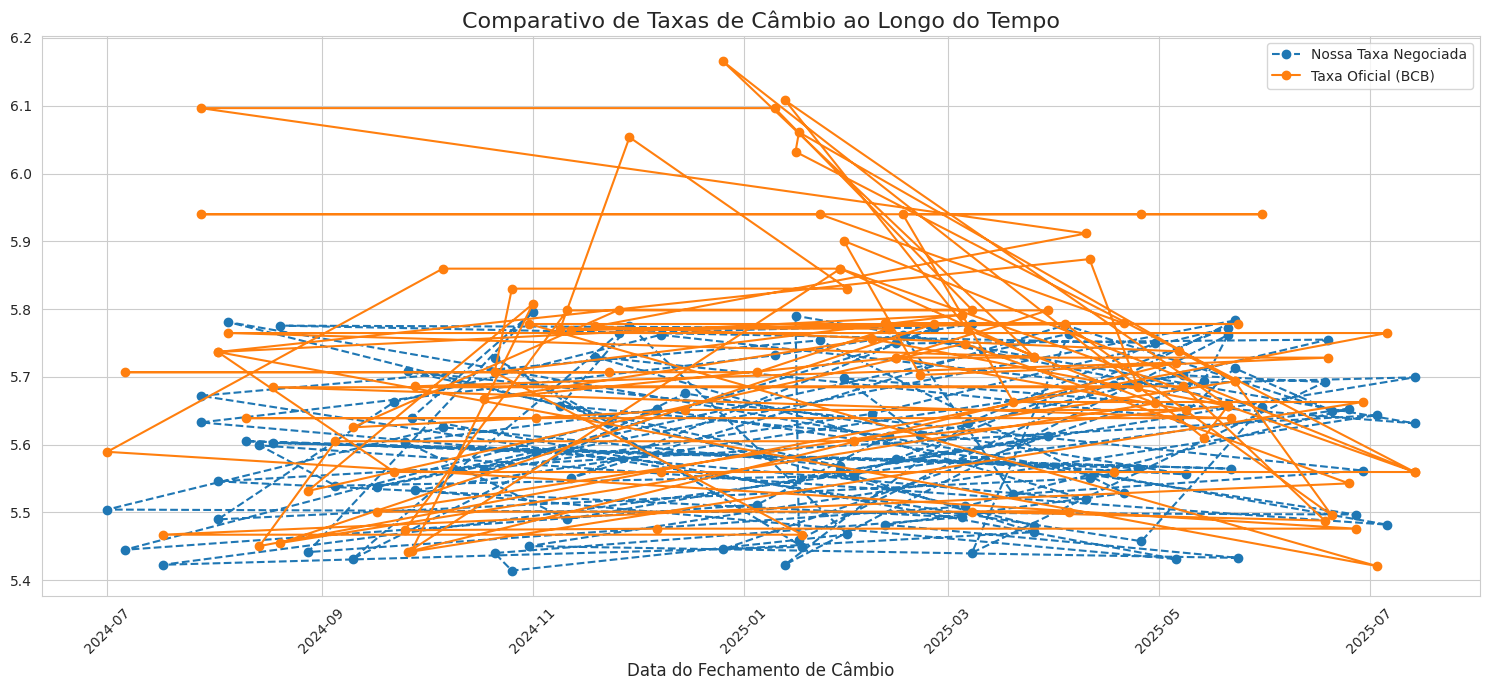

In [ ]:
from re import template
# Passo 16: Criando nossa primeira visualização de dados

# Configurando um estilo visual mais agradável para os gráficos
sns.set_style("whitegrid")
plt.figure(figsize=(15, 7)) # Define o tamanho do gráfico

# Plotando as duas linhas: a nossa taxa e a taxa do gráfico
# Usamos 'market' para destacar os pontos de dados e 'linestyle' para diferenciar as linhas
plt.plot(df_completo['Data_Fechamento_Cambio'], df_completo['Taxa_Cambio_Negociada'], label='Nossa Taxa Negociada', marker='o', linestyle='--')
plt.plot(df_completo['Data_Fechamento_Cambio'], df_completo['taxa_dolar_bcb'], label='Taxa Oficial (BCB)', marker='o', linestyle='-')

# Adicionando títulos e legendas para deixar o gráfico claro e profissional
plt.title('Comparativo de Taxas de Câmbio ao Longo do Tempo', fontsize=16)
plt.xlabel('Data do Fechamento de Câmbio', fontsize=12)
plt.legend() # Mostra a legenda definida no comando 'lebel'
plt.xticks(rotation=45) # Rotaciona as datas no eixo X para melhor leitura
plt.tight_layout() # Ajusta o layout para evitar que os textos se sobreponham

# Adicionando um passo profissional: salvar o gráfico como um arquivo de imagem
# Este arquivo poderá ser usado em relatórios e apresentações.
plt.savefig('grafico_comparativo_cambio.png')
# Exibindo o gráfico na tela
plt.show()

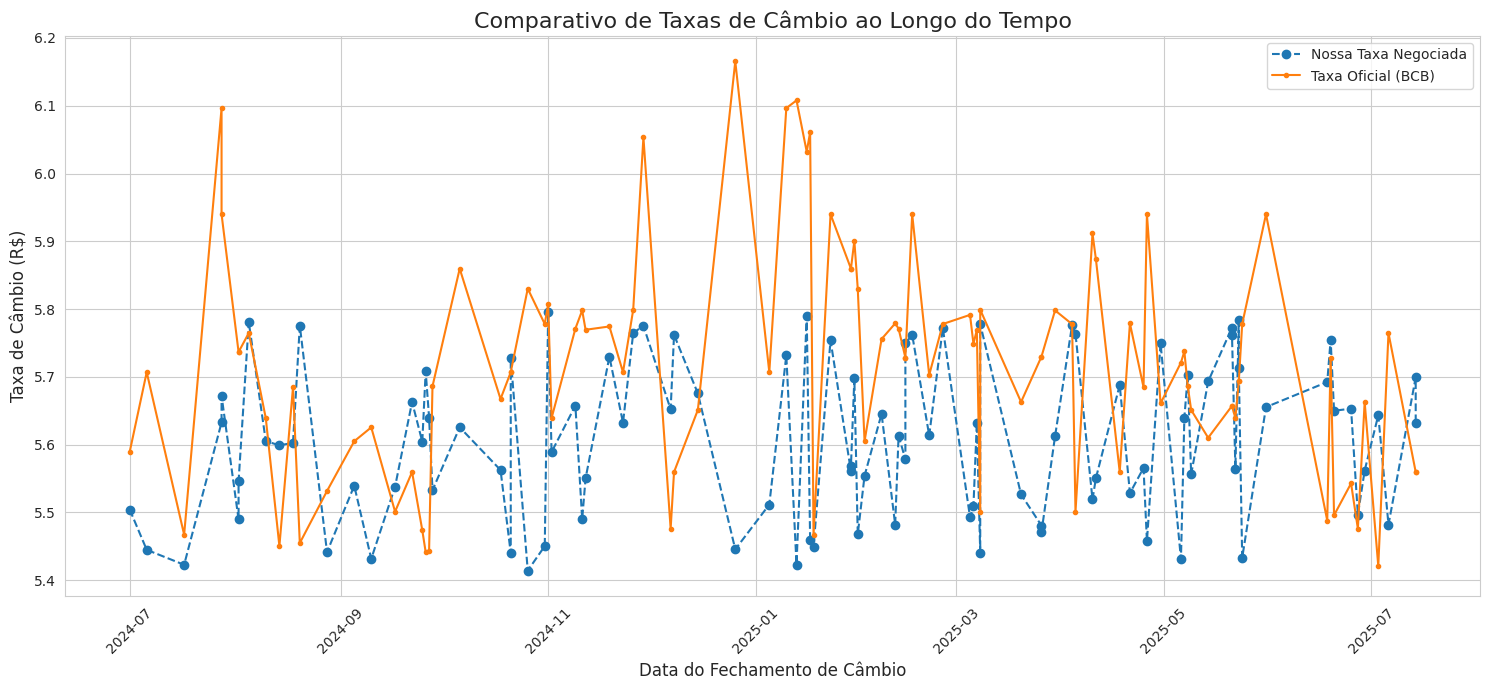

In [ ]:
# Passo 16.1: Melhorando o Gráfico com Ordenação de Dados

# Primeiro, criar uma cópia do DataFrame ordenada pela data
df_ordenado = df_completo.sort_values(by='Data_Fechamento_Cambio')

# --- Agora, o gódigo para plotar é o mesmo, mas usamos o df_ordenado ---

sns.set_style("whitegrid")
plt.figure(figsize=(15, 7))

# Plotando as duas linhas: a nossa taxa e a taxa do gráfico
plt.plot(df_ordenado['Data_Fechamento_Cambio'], df_ordenado['Taxa_Cambio_Negociada'], label='Nossa Taxa Negociada', marker='o', linestyle='--')
plt.plot(df_ordenado['Data_Fechamento_Cambio'], df_ordenado['taxa_dolar_bcb'], label='Taxa Oficial (BCB)', marker='.', linestyle='-')

# Adicionando os detalhes ao gráfico
plt.title('Comparativo de Taxas de Câmbio ao Longo do Tempo', fontsize=16)
plt.xlabel('Data do Fechamento de Câmbio', fontsize=12)
plt.ylabel('Taxa de Câmbio (R$)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Salvando a versão melhorada do gráfico
plt.savefig('grafico_comparativo_cambio_ordenado.png')

# Exibindo o gráfico
plt.show()

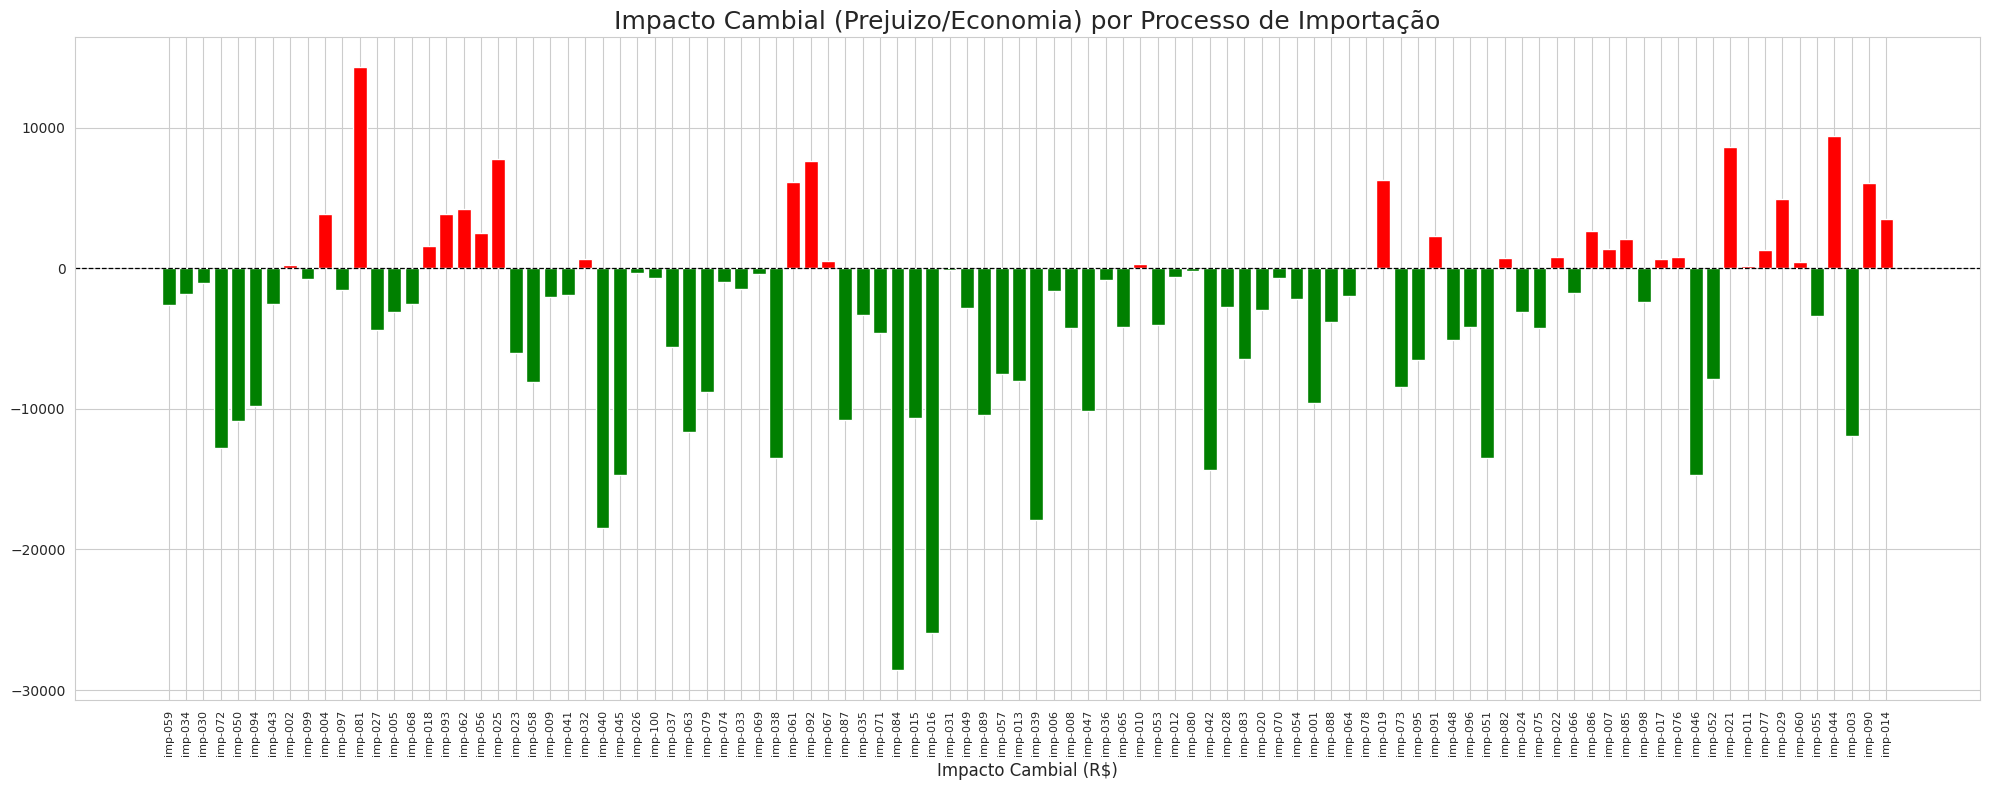

In [ ]:
# Passo 17: Visualizando o Impacto Financeiro por Importação

# Continuar usando o df_ordenado para manter a consistência.
# Primeiro, criar uma coluna 'cor' para o gráfico.
# Esta é uma técnica de visualização avançada muito útil.
df_ordenado['cor'] = ['red' if x > 0 else 'green' for x in df_ordenado['Impacto_Cambial_BRL']]

# Criando o gráfico de barras
plt.figure(figsize=(20, 8)) # Um gráfico mais longo para vermos todos os processos
plt.bar(df_ordenado['ID_Processo'], df_ordenado['Impacto_Cambial_BRL'], color=df_ordenado['cor'])

# Adicionando detalhes ao gráfico
plt.title('Impacto Cambial (Prejuizo/Economia) por Processo de Importação',fontsize=18)
plt.xlabel('ID do Processo de Importação', fontsize=12)
plt.xlabel('Impacto Cambial (R$)', fontsize=12)
plt.xticks(rotation=90, fontsize=8) # Rotaciona os IDs dos processos para melhor leitura
plt.axhline(0, color='black', linewidth=0.9, linestyle='--') # Adiciona uma linha no zero para referência
plt.tight_layout()

# Salvando este novo gráfico
plt.savefig('impacto_cambial_por_processo.png')

# Exibindo o gráfico
plt.show()

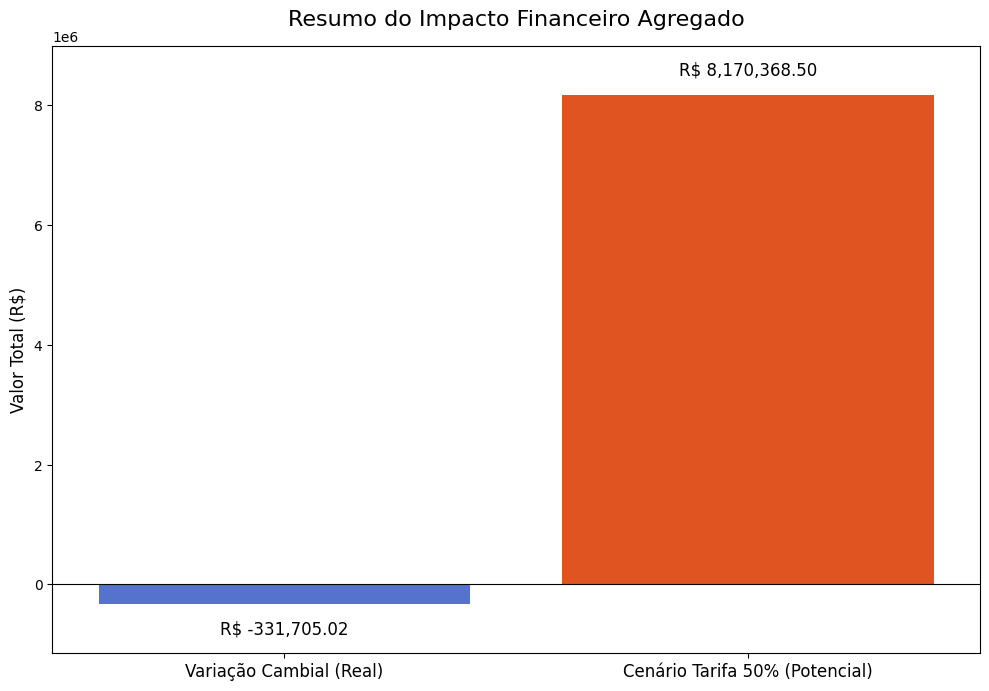

In [11]:
# Passo 18: Visualizando os Resultados Agregados (Versão Definitiva)

# Os dados de resumo continuam os mesmos
total_impacto_cambial = df_completo['Impacto_Cambial_BRL'].sum()
total_tarifa_adicional = df_completo['Tarifa_Adicional_BRL'].sum()
dados_resumo = {
    'Tipo de Impacto': ['Variação Cambial (Real)', 'Cenário Tarifa 50% (Potencial)'],
    'Valor Total (R$)': [total_impacto_cambial, total_tarifa_adicional]
}
df_resumo = pd.DataFrame(dados_resumo)

# Criando o gráfico de barras
plt.figure(figsize=(10, 7))
barplot = sns.barplot(x='Tipo de Impacto', y='Valor Total (R$)', data=df_resumo, palette=['royalblue', 'orangered'], hue='Tipo de Impacto', legend=False)

# --- LÓGICA FINAL E CORRETA DE AJUSTE DOS RÓTULOS E LIMITES ---
# 1. Definindo um "espaço" (offset) para os rótulos
offset = df_resumo['Valor Total (R$)'].abs().max() * 0.05

# 2. Loop com lógica de posicionamento correta para plt.text()
for index, row in df_resumo.iterrows():
    valor = row['Valor Total (R$)']
    texto = f"R$ {valor:,.2f}"

    if valor >= 0:
        # Para valores POSITIVOS, posiciona o texto ACIMA da barra
        y_pos = valor + offset
        plt.text(index, y_pos, texto, color='black', ha="center", va='center', fontsize=12)
    else:
        # Para valores NEGATIVOS, posiciona o texto ABAIXO da barra
        y_pos = valor - offset
        plt.text(index, y_pos, texto, color='black', ha="center", va='center', fontsize=12)

# 3. Ajustando os limites do eixo Y para garantir que os textos caibam
y_max = df_resumo['Valor Total (R$)'].max()
y_min = df_resumo['Valor Total (R$)'].min()
plt.ylim(y_min - (offset*2), y_max + (offset*2))
# --- FIM DA LÓGICA ---

# Adicionando os outros detalhes
plt.title('Resumo do Impacto Financeiro Agregado', fontsize=16, y=1.02)
plt.xlabel('')
plt.ylabel('Valor Total (R$)', fontsize=12)
plt.xticks(fontsize=12)
plt.axhline(0, color='black', linewidth=0.8)
plt.tight_layout()

# Salvando o gráfico final
plt.savefig('grafico_resumo_total_final.png')
plt.show()
